In [ ]:
## Uploading the dataset
from google.colab import files
uploaded = files.upload()

Saving fivethirtyeight_partisan_lean_STATES.csv to fivethirtyeight_partisan_lean_STATES.csv
Saving us-states.csv to us-states.csv


## **Combining The Data From the Two CSV Files**

In [ ]:
import pandas as pd

# Load the COVID-19 data
covid_data = pd.read_csv("us-states.csv")

# Aggregate daily data to monthly means for cases_avg_per_100k and deaths_avg_per_100k
covid_data['date'] = pd.to_datetime(covid_data['date'])  # Convert date column to datetime
covid_data['date'] = covid_data['date'].dt.to_period('M')  # Extract month and year
covid_monthly_data = covid_data.groupby(['date', 'state'])[['cases_avg_per_100k', 'deaths_avg_per_100k']].mean().reset_index()

# Load the political leaning data
political_lean_data = pd.read_csv("fivethirtyeight_partisan_lean_STATES.csv")

# Merge COVID-19 data with political leaning data based on the 'state' column
merged_data = pd.merge(covid_monthly_data, political_lean_data, on='state')

# Rename columns
merged_data.rename(columns={'cases_avg_per_100k': 'cases_avg_per_100k_mean',
                            'deaths_avg_per_100k': 'deaths_avg_per_100k_mean',
                            '2021': 'partisian_leaning'},
                   inplace=True)

# Display the resulting dataset
merged_data.head()

date    state  cases_avg_per_100k_mean  deaths_avg_per_100k_mean  \
0  2020-01  Arizona                 0.000000                  0.000000   
1  2020-02  Arizona                 0.000000                  0.000000   
2  2020-03  Arizona                 0.359355                  0.005484   
3  2020-04  Arizona                 2.723333                  0.124333   
4  2020-05  Arizona                 4.980323                  0.229032   

   partisian_leaning  
0           -7.58754  
1           -7.58754  
2           -7.58754  
3           -7.58754  
4           -7.58754

## **Tasks to Complete (deliverables)**

1) Create a variable red_blue that codes the labels “red” and “blue” on the basis of
the variable partisan_leaning. Code partisan_leaning values that are negative as
red, and code partisan_leaning values that are positive as blue.


In [ ]:
# Create a new column 'red_blue' based on 'partisan_leaning'
merged_data['red_blue'] = merged_data['partisian_leaning'].apply(lambda x: 'red' if x < 0 else 'blue')

# Display the updated DataFrame with the 'red_blue' column
merged_data.head()

date    state  cases_avg_per_100k_mean  deaths_avg_per_100k_mean  \
0  2020-01  Arizona                 0.000000                  0.000000   
1  2020-02  Arizona                 0.000000                  0.000000   
2  2020-03  Arizona                 0.359355                  0.005484   
3  2020-04  Arizona                 2.723333                  0.124333   
4  2020-05  Arizona                 4.980323                  0.229032   

   partisian_leaning red_blue  
0           -7.58754      red  
1           -7.58754      red  
2           -7.58754      red  
3           -7.58754      red  
4           -7.58754      red

**2) Answer the following questions using your properly combined and daily aggregated data table:**

i) Averaging across months AND states within red and blue categories,
what are the means for cases_avg_per_100k_mean and
deaths_avg_per_100k_mean for red states, and what are the
corresponding means for the blue states?. You should have 4 means -
two (case and death statistics) for red states, and two (case and death
statistics) for blue states.

In [ ]:
# Group the data by 'red_blue' and calculate the means
means_by_red_blue = merged_data.groupby('red_blue')[['cases_avg_per_100k_mean', 'deaths_avg_per_100k_mean']].mean()

# Display the means
means_by_red_blue

cases_avg_per_100k_mean  deaths_avg_per_100k_mean
red_blue                                                   
blue                    25.734870                  0.250071
red                     28.628365                  0.315755

ii) Averaging across states within read and blue categories, what are the means for cases_avg_per_100k_mean and deaths_avg_per_100k_mean for each month? There should be 27 means for red states and 27 means for blue states – for a total of 54 means for “cases_avg_per_100k”.
Additionally, there should also be 54 means for “deaths_avg_per_100k”
– for a total of 108 means. Put these means in a table for display - e.g.
1/2020 – 12/2020 (12 months) and 1/2021 – 12/2021 (12 months) and
1/2022 – 3/2022 (3 months) for each of red and blue states, which gives
54 means total in the table for “cases_avg_per_100k”. Create a similar
table for 54 means total for “deaths_avg_per_100k”.

***Table for cases_avg_per_100k_mean:***

In [ ]:
# Filter data for specific date ranges
start_date_1 = '2020-01'
end_date_1 = '2020-12'
start_date_2 = '2021-01'
end_date_2 = '2021-12'
start_date_3 = '2022-01'
end_date_3 = '2022-03'

# Extract the year and month from the 'date' column
merged_data['year_month'] = merged_data['date'].dt.strftime('%Y-%m')

filtered_data_1 = merged_data[(merged_data['year_month'] >= start_date_1) & (merged_data['year_month'] <= end_date_1)]
filtered_data_2 = merged_data[(merged_data['year_month'] >= start_date_2) & (merged_data['year_month'] <= end_date_2)]
filtered_data_3 = merged_data[(merged_data['year_month'] >= start_date_3) & (merged_data['year_month'] <= end_date_3)]

# Combine the filtered dataframes
filtered_data = pd.concat([filtered_data_1, filtered_data_2, filtered_data_3])

# Group the filtered data by 'red_blue' and 'year_month' and calculate the means
means_by_red_blue_month = filtered_data.groupby(['red_blue', 'year_month'])[['cases_avg_per_100k_mean']].mean()

# Pivot the table for 'cases_avg_per_100k_mean' for display
cases_table_for_display = means_by_red_blue_month.pivot_table(index='year_month', columns='red_blue', values='cases_avg_per_100k_mean')

print("\nTable for cases_avg_per_100k_mean:")
cases_table_for_display



Table for cases_avg_per_100k_mean:


red_blue          blue         red
year_month                        
2020-01       0.000000    0.000000
2020-02       0.000552    0.009846
2020-03       1.540241    0.703291
2020-04      11.974217    4.714527
2020-05      10.432387    5.440968
2020-06       5.307967    7.966774
2020-07       7.104339   19.213174
2020-08       7.825790   17.119511
2020-09       7.224067   17.336785
2020-10      12.121194   29.277190
2020-11      36.864733   64.207882
2020-12      50.924323   65.340697
2021-01      49.012113   58.250697
2021-02      24.026643   26.005876
2021-03      19.352323   15.194974
2021-04      22.928550   16.101935
2021-05      11.104661   10.024547
2021-06       3.240750    4.826430
2021-07       5.180065   12.895276
2021-08      23.292468   46.030884
2021-09      31.061300   57.868785
2021-10      26.287290   38.581852
2021-11      30.791767   32.063065
2021-12      63.713484   41.637992
2022-01     197.623000  186.657399
2022-02      49.233643   65.587765
2022-03      12.520677   11.294735

***Table for deaths_avg_per_100k_mean:***

In [ ]:
# Filter data for specific date ranges
start_date_1 = '2020-01'
end_date_1 = '2020-12'
start_date_2 = '2021-01'
end_date_2 = '2021-12'
start_date_3 = '2022-01'
end_date_3 = '2022-03'

# Extract the year and month from the 'date' column
merged_data['year_month'] = merged_data['date'].dt.strftime('%Y-%m')

filtered_data_1 = merged_data[(merged_data['year_month'] >= start_date_1) & (merged_data['year_month'] <= end_date_1)]
filtered_data_2 = merged_data[(merged_data['year_month'] >= start_date_2) & (merged_data['year_month'] <= end_date_2)]
filtered_data_3 = merged_data[(merged_data['year_month'] >= start_date_3) & (merged_data['year_month'] <= end_date_3)]

# Combine the filtered dataframes
filtered_data = pd.concat([filtered_data_1, filtered_data_2, filtered_data_3])

# Group the filtered data by 'red_blue' and 'year_month' and calculate the means
means_by_red_blue_month = filtered_data.groupby(['red_blue', 'year_month'])[['deaths_avg_per_100k_mean']].mean()

# Pivot the table for 'deaths_avg_per_100k_mean' for display
deaths_table_for_display = means_by_red_blue_month.pivot_table(index='year_month', columns='red_blue', values='deaths_avg_per_100k_mean')

print("\nTable for deaths_avg_per_100k_mean:")
deaths_table_for_display


Table for deaths_avg_per_100k_mean:


red_blue        blue       red
year_month                    
2020-01     0.000000  0.000000
2020-02     0.000000  0.000000
2020-03     0.027074  0.012579
2020-04     0.704250  0.212118
2020-05     0.677177  0.229282
2020-06     0.300367  0.153882
2020-07     0.139065  0.210656
2020-08     0.116661  0.314579
2020-09     0.109650  0.263742
2020-10     0.137532  0.320832
2020-11     0.286617  0.581269
2020-12     0.640871  0.895473
2021-01     0.714532  0.962019
2021-02     0.537250  0.704677
2021-03     0.299145  0.334943
2021-04     0.183000  0.207677
2021-05     0.151129  0.172341
2021-06     0.084833  0.112495
2021-07     0.052242  0.101145
2021-08     0.104919  0.318366
2021-09     0.252117  0.670806
2021-10     0.284226  0.660416
2021-11     0.287500  0.499086
2021-12     0.352597  0.500458
2022-01     0.585516  0.568689
2022-02     0.556679  0.772661
2022-03     0.252258  0.457773

iii) Create 2 line chart that plots two time trends. One chart will have 27
means for the red states, and 27 means for the blue states for
“cases_avg_per_100k”. The other time trend chart will have 27 means
for the red states, and 27 means for the blue states for
“deaths_avg_per_100k”. In each graph, use a red colored line for the red
states, and use a blue colored line for the blue states. Are there any
OVERALL prominent trends in the data across months? If so, please
describe these trends in a qualitative fashion (e.g. up, down, linear,
curvilinear). Regarding the two outcome variables “cases_avg_per_100k”
and “deaths_avg_per_100k” - are there any prominent differences
between the two groups – red and blue groups – in terms of trend? If so,
please describe the DIFFERENCES in these trends in a qualitative fashion.
Based on your reading of the Pew Research article listed above, does
your data – qualitatively – support any of the conclusions that were
drawn in the article. Please use sound reasoning in drawing your
conclusions.

***Time Trend of Cases per 100k***

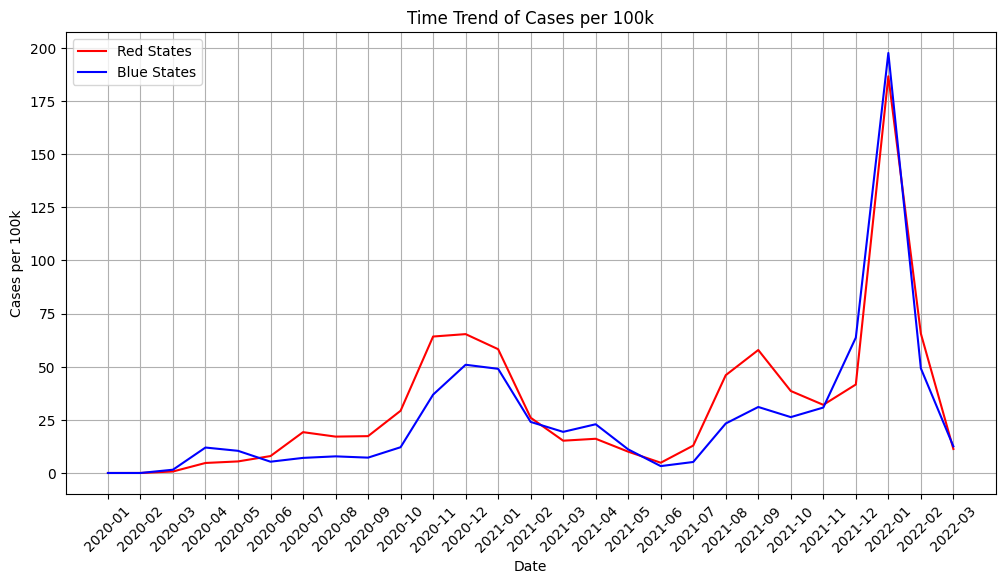

In [ ]:
import matplotlib.pyplot as plt

# Create line chart for 'cases_avg_per_100k'
plt.figure(figsize=(12, 6))
plt.title('Time Trend of Cases per 100k')
plt.xlabel('Date')
plt.ylabel('Cases per 100k')

# Plot red states
plt.plot(cases_table_for_display.index, cases_table_for_display['red'], label='Red States', color='red')

# Plot blue states
plt.plot(cases_table_for_display.index, cases_table_for_display['blue'], label='Blue States', color='blue')

plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Show the chart
plt.show()

***Time Trend of Deaths per 100k***

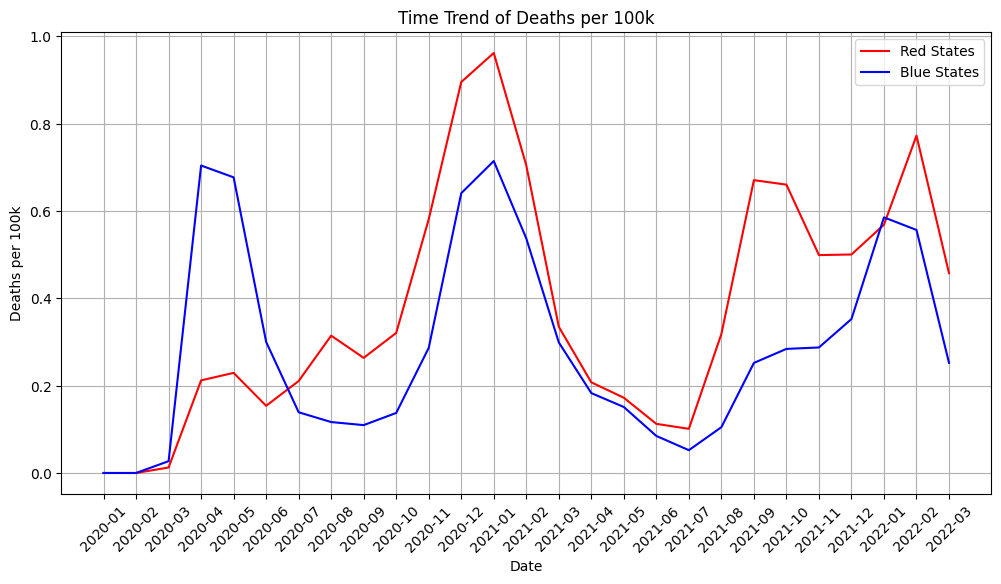

In [ ]:
# Create line chart for 'deaths_avg_per_100k'
plt.figure(figsize=(12, 6))
plt.title('Time Trend of Deaths per 100k')
plt.xlabel('Date')
plt.ylabel('Deaths per 100k')

# Plot red states
plt.plot(deaths_table_for_display.index, deaths_table_for_display['red'], label='Red States', color='red')

# Plot blue states
plt.plot(deaths_table_for_display.index, deaths_table_for_display['blue'], label='Blue States', color='blue')

plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Show the chart
plt.show()